# Project 3

## Loading Data

In [11]:
from datasets import load_dataset
from datasets import DatasetDict
import pandas as pd
import time
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
df[["Text","Score"]]

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5
...,...,...
568449,Great for sesame chicken..this is a good if no...,5
568450,I'm disappointed with the flavor. The chocolat...,2
568451,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5


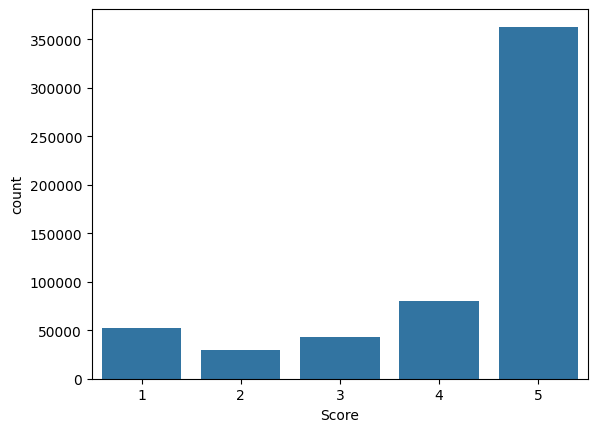

In [12]:
sns.countplot(x="Score",data=df)
plt.show()

## Resampling

In [13]:
rus = RandomUnderSampler(random_state=42)
X = df.drop("Score",axis=1)
y = df['Score']
X_resampled, y_resampled = rus.fit_resample(X, y)
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [14]:
df_resampled

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
348178,348179,B000O160KE,A1P9NJ7JQZRHCT,Professor X,0,1,1259452800,Sweet & Low without the cancer.,"If you like the (bitter) taste of Sweet & Low,...",1
306507,306508,B004NB79VU,ACP87CNOMX1DJ,"Tanya L. Ouzts ""wedding mom""",0,0,1337558400,wedding mom,item was much smaller than appeared on line. ...,1
228312,228313,B003VXHGPK,A25UTJ1AXFC0Z9,Judy Armstrong,1,2,1323388800,Don't waste your money or your Keurig on this!,This coffee tastes very flavorful and is not t...,1
448368,448369,B0030FGMFY,A2JER2JSWJG5VL,Jaybee,4,5,1313798400,MADE IN CHINA!!!,I bought these for my Dalmatian for the first ...,1
515440,515441,B004S04X4W,AY1EF0GOH80EK,Natasha Stryker,3,6,1324252800,Tastes like cheap meat and salt,"I guess I am in the minority, but this hash pr...",1
...,...,...,...,...,...,...,...,...,...,...
540120,540121,B002W08W56,A18DGEEKUWAUII,Sharon L. Barlow,4,4,1294704000,Yummy beans,These are absolutely delicious! My only conce...,5
337126,337127,B000F4F934,ANX51Y0Y4TXAK,"Wonky ""nonconformist""",4,4,1184716800,Extraordinary Ordinary Tea,If you are a person whose only experience with...,5
490561,490562,B000CQE3IC,A2C9XE9I8RSKNX,J. Johnson,1,1,1321833600,Perfect snack size Slim Jim,This pack of 100 snack size Slim Jims are perf...,5
362798,362799,B000LQNK6E,A3G3RN4AMXWR90,Zzimdark,0,0,1344384000,Great!,I usually bring lunch to work and there are so...,5


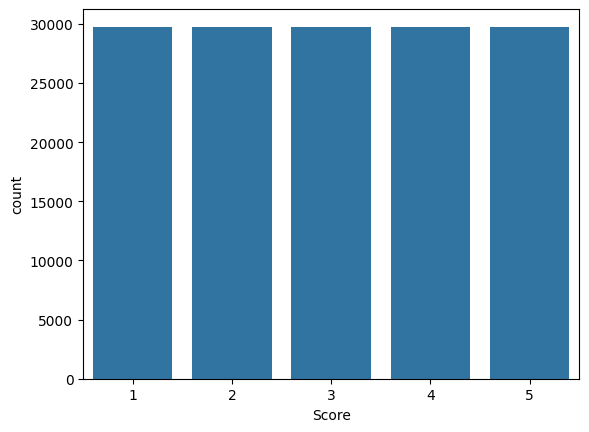

In [15]:
sns.countplot(x="Score",data=df_resampled)
plt.show()

In [21]:
df_resampled = df_resampled.sample(frac=1).reset_index(drop=True)

In [22]:
df_resampled.to_csv('Reviews_Sampled.csv',index=False)

In [23]:
dataset = load_dataset("csv", data_files="Reviews_Sampled.csv")

Generating train split: 0 examples [00:00, ? examples/s]

In [24]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Score'],
        num_rows: 148845
    })
})

## Data preprocessing

In [25]:
columns_to_keep = ['Text', 'Score']
columns_to_remove = [col for col in dataset['train'].column_names if col not in columns_to_keep]
dataset = DatasetDict({'train': dataset['train'].map(lambda example: {col: example[col] for col in columns_to_keep}, 
                                                     remove_columns=columns_to_remove, batched=True)})

Map:   0%|          | 0/148845 [00:00<?, ? examples/s]

In [26]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Text', 'Score'],
        num_rows: 148845
    })
})

In [27]:
train_test_dataset = dataset['train'].train_test_split(test_size=0.2)
train_val_dataset = train_test_dataset['train'].train_test_split(test_size=0.25)  # 0.25 x 0.8 = 0.2
dataset = DatasetDict({
    'train': train_val_dataset['train'],
    'val': train_val_dataset['test'],
    'test': train_test_dataset['test']
})

In [28]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Text', 'Score'],
        num_rows: 89307
    })
    val: Dataset({
        features: ['Text', 'Score'],
        num_rows: 29769
    })
    test: Dataset({
        features: ['Text', 'Score'],
        num_rows: 29769
    })
})

## Loading BERT Model

In [29]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [30]:
model_path = '/tf/models/huggingface/hub/models--google-bert--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594'
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=5)
model.to(device)
tokenizer = AutoTokenizer.from_pretrained(model_path)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /tf/models/huggingface/hub/models--google-bert--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [32]:
def print_number_of_trainable_model_parameters(model):
    trainable_model_params = 0
    all_model_params = 0
    for _, param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params += param.numel()
    return f"trainable model parameters: {trainable_model_params}\nall model parameters: {all_model_params}\npercentage of trainable model parameters: {trainable_model_params / all_model_params * 100:.2f}%"

print(print_number_of_trainable_model_parameters(model))

trainable model parameters: 109486085
all model parameters: 109486085
percentage of trainable model parameters: 100.00%


## Inference of pre-trained model

In [33]:
import torch.nn.functional as F
index = 200
Text = dataset['test'][index]['Text']
Score = dataset['test'][index]['Score']

prompt = f"""
Score the sentiment of the following text on a scale from 1 to 5, where: 
1 = Very Negative, 2 = Somewhat Negative, 3 = Neutral, 4 = Somewhat Positive, 5 = Very Positive.

Text:
{Text}

Score:
"""

inputs = tokenizer(prompt, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(**inputs)
probs = F.softmax(output.logits, dim=-1)

dash_line = '-'.join('' for x in range(100))
print(dash_line)
print(f'INPUT PROMPT:\n{prompt}')
print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{Score}\n')
print(dash_line)
print(f'MODEL GENERATION – ZERO SHOT:\n{probs}')

---------------------------------------------------------------------------------------------------
INPUT PROMPT:

Score the sentiment of the following text on a scale from 1 to 5, where: 
1 = Very Negative, 2 = Somewhat Negative, 3 = Neutral, 4 = Somewhat Positive, 5 = Very Positive.

Text:
I chose the diet soda. Notice that the total amount of the product is not written. I was perplexed at first, but then discerned that the product image clearly says 750ml. So at $8.39 it seemed to be a decent price. However what I received was a 500ml bottle. Not worth the hassle of returning for a couple of bucks, but an annoyance none the less. So beware when you purchase. I suggest you assume that you will receive a 500ml bottle.

Score:

---------------------------------------------------------------------------------------------------
BASELINE HUMAN SUMMARY:
1

---------------------------------------------------------------------------------------------------
MODEL GENERATION – ZERO SHOT:
tenso

## Tokenization

In [34]:
def tokenize_function(example):
    start_prompt = "Score the following text:\n\n"
    end_prompt = "\n\nScore: "
    prompts = [start_prompt + text + end_prompt for text in example["Text"]]
    encoding = tokenizer(prompts, padding="max_length", truncation=True, return_tensors="pt", return_attention_mask=True)
    example['input_ids'] = encoding['input_ids'].to(device)
    example['attention_mask'] = encoding['attention_mask'].to(device)
    
    example['labels'] = [label - 1 for label in example['Score']]

    return example


tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/89307 [00:00<?, ? examples/s]

Map:   0%|          | 0/29769 [00:00<?, ? examples/s]

Map:   0%|          | 0/29769 [00:00<?, ? examples/s]

In [35]:
print("Shapes of the datasets:")
print(f"Training: {tokenized_datasets['train'].shape}")
print(f"Validation: {tokenized_datasets['val'].shape}")
print(f"Test: {tokenized_datasets['test'].shape}")
print(tokenized_datasets)

Shapes of the datasets:
Training: (89307, 5)
Validation: (29769, 5)
Test: (29769, 5)
DatasetDict({
    train: Dataset({
        features: ['Text', 'Score', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 89307
    })
    val: Dataset({
        features: ['Text', 'Score', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 29769
    })
    test: Dataset({
        features: ['Text', 'Score', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 29769
    })
})


## Training Model

In [36]:
from transformers import TrainingArguments, Trainer
output_dir = f'./score-{str(int(time.time()))}'

training_args = TrainingArguments(
    output_dir=output_dir,
    learning_rate=1e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=1,
    max_steps=300
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['val']
)

2024-03-02 17:02:15.147411: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-02 17:02:16.083386: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 17:02:16.083461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 17:02:16.088286: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 17:02:16.538521: I tensorflow/core/platform/cpu_feature_g

In [37]:
trainer.train()

Step,Training Loss
1,1.818300
2,1.772900
3,1.624100
4,1.632700
5,1.587500
6,1.614700
7,1.656600
8,1.704800
9,1.568000
10,1.528400


TrainOutput(global_step=300, training_loss=1.5044594065348307, metrics={'train_runtime': 270.5052, 'train_samples_per_second': 8.872, 'train_steps_per_second': 1.109, 'total_flos': 631483541913600.0, 'train_loss': 1.5044594065348307, 'epoch': 0.03})

## Inference of trained model

In [38]:
index = 200
Text = dataset['test'][index]['Text']
Score = dataset['test'][index]['Score']

prompt = f"""
Score the sentiment of the following text on a scale from 1 to 5, where: 
1 = Very Negative, 2 = Somewhat Negative, 3 = Neutral, 4 = Somewhat Positive, 5 = Very Positive.

Text:
{Text}

Score:
"""

inputs = tokenizer(prompt, return_tensors='pt').to(device)
with torch.no_grad():
    output = model(**inputs)
probs = F.softmax(output.logits, dim=-1)
predicted_class = torch.argmax(torch.tensor(probs),dim=1).item() + 1

dash_line = '-'.join('' for x in range(100))
print(dash_line)
print(f'INPUT PROMPT:\n{prompt}')
print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{Score}\n')
print(dash_line)
print(f'MODEL GENERATION – ZERO SHOT:\n{predicted_class}')

---------------------------------------------------------------------------------------------------
INPUT PROMPT:

Score the sentiment of the following text on a scale from 1 to 5, where: 
1 = Very Negative, 2 = Somewhat Negative, 3 = Neutral, 4 = Somewhat Positive, 5 = Very Positive.

Text:
I chose the diet soda. Notice that the total amount of the product is not written. I was perplexed at first, but then discerned that the product image clearly says 750ml. So at $8.39 it seemed to be a decent price. However what I received was a 500ml bottle. Not worth the hassle of returning for a couple of bucks, but an annoyance none the less. So beware when you purchase. I suggest you assume that you will receive a 500ml bottle.

Score:

---------------------------------------------------------------------------------------------------
BASELINE HUMAN SUMMARY:
1

---------------------------------------------------------------------------------------------------
MODEL GENERATION – ZERO SHOT:
1


/tmp/ipykernel_34/1452151160.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_class = torch.argmax(torch.tensor(probs),dim=1).item() + 1


## Evaluation

In [39]:
trainer.evaluate()

{'eval_loss': 1.3253785371780396,
 'eval_runtime': 1295.7225,
 'eval_samples_per_second': 22.975,
 'eval_steps_per_second': 2.873,
 'epoch': 0.03}

In [55]:
predictions = []
labels = []
for index in range(1000):
    Text = dataset['test'][index]['Text']
    Score = dataset['test'][index]['Score']
    
    prompt = f"""
    Score the sentiment of the following text on a scale from 1 to 5, where: 
    1 = Very Negative, 2 = Somewhat Negative, 3 = Neutral, 4 = Somewhat Positive, 5 = Very Positive.
    
    Text:
    {Text}
    
    Score:
    """
    
    inputs = tokenizer(prompt, return_tensors='pt').to(device)
    with torch.no_grad():
        try:
            output = model(**inputs)
        except:
            continue
    probs = F.softmax(output.logits, dim=-1)
    predicted_class = torch.argmax(torch.tensor(probs),dim=1).item() + 1

    if abs(predicted_class - Score) == 1:
        predicted_class = Score
    predictions.append(predicted_class)
    labels.append(Score)

/tmp/ipykernel_34/3950544786.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_class = torch.argmax(torch.tensor(probs),dim=1).item() + 1


In [56]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_performance(labels, predictions, average='weighted'):
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average=average)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [58]:
results = evaluate_performance(labels, predictions)

In [64]:
pd.Series(results)

accuracy     0.861396
precision    0.873842
recall       0.861396
f1           0.861860
dtype: float64